## Writing Structured Programs

In [4]:
import nltk
import re
import pprint
from bs4 import BeautifulSoup

<b> Assignment

In [1]:
foo='Monty'

In [2]:
bar=foo

In [3]:
foo='python'

In [4]:
bar

'Monty'

bar is a copy of foo. However, assignment statements do not always involve making copies in this way. Assingent always cpies the value of an epression, but a value is not always what is epected to be.

In particular, the 'value' of a structured object such as a list is actually just a reference to the object;

In [5]:
foo=['Monty','python']

In [6]:
bar=foo


In [7]:
foo[1]='Book'

In [8]:
bar

['Monty', 'Book']

Here the content is not copied, but the object reference. for eg: foo is referenced to location 3133, so bar is also referenced to 3133. Updating foo, also modifies bar.

In [9]:
empty=[]

In [10]:
nested=[empty, empty, empty]

In [11]:
nested

[[], [], []]

In [12]:
nested[1].append('Python')

In [13]:
nested

[['Python'], ['Python'], ['Python']]

<b> Difference between modifying an object via an object reference and overwriting an object reference

In [14]:
nested=[[]]*3

In [15]:
nested

[[], [], []]

In [16]:
nested[1].append('Python')

In [17]:
nested


[['Python'], ['Python'], ['Python']]

In [18]:
nested[1]='Monty'

In [19]:
nested

[['Python'], 'Monty', ['Python']]

<b> Equality

In [20]:
size=5

In [21]:
python=['python']

In [30]:
snake_nest_equal=[python]*size

In [23]:
snake_nest[0]==snake_nest[1]==snake_nest[2]==snake_nest[3]==snake_nest[4]

True

In [24]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

In [26]:
import random
position=random.choice(range(size))
snake_nest[position]=['Python']
snake_nest

[['python'], ['python'], ['Python'], ['python'], ['python']]

In [27]:
snake_nest[0]==snake_nest[1]==snake_nest[2]==snake_nest[3]==snake_nest[4]

False

In [28]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

In [29]:
[id(snake)for snake in snake_nest]

[99050312, 99050312, 96584968, 99050312, 99050312]

In [31]:
[id(snake)for snake in snake_nest_equal]

[99050312, 99050312, 99050312, 99050312, 99050312]

<b> Conditionals

In [32]:
mixed=['cat','',['dog'],[]]

In [33]:
for element in mixed:
    if element:
        print(element)

cat
['dog']


if len(element)>0 is not required to be specified.

In [34]:
animals=['cat','dog']

In [35]:
if ('cat' in animals):
    print(1)
elif('dog' in animals):
    print(2)

1


If if clause of the satement is satisfied, python never tries to evaluate the elif clause. By ocntrast if  if statement is used, it would evaluate both of the statements.

functions all() and any() can be applied to a list to check whether all or any items meet some coditions.

In [36]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.'] 

In [37]:
all(len(w)>4 for w in sent)

False

In [38]:
any(len(w)>4 for w in sent)

True

<b> Sequences

Sequence obbjects are strings, lists and tuples. Tuples are formed with the comma operator , and typically enclosed using parentheses.

 Like lists and strings, tuples can be indexed and sliced , and have a length

In [39]:
 t = 'walk', 'fem', 3 

In [40]:
t

('walk', 'fem', 3)

In [41]:
 t[0] 

'walk'

In [42]:
 t[1:] 

('fem', 3)

In [43]:
len(t)

3

<b> Comparing strings, lists, and tuples for indexing, slice, and length operation on each type: 

In [44]:
raw = 'I turned off the spectroroute'

In [45]:
 text = ['I', 'turned', 'off', 'the', 'spectroroute'] 

In [46]:
pair = (6, 'turned') 

In [47]:
raw[2], text[3], pair[1] 

('t', 'the', 'turned')

In [48]:
raw[-3:], text[-3:], pair[-3:] 

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [49]:
len(raw), len(text), len(pair)

(29, 5, 2)

Some other objects, such as a FreqDist, can be converted into a sequence (using list()) and support iteration: 

In [50]:
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.' 

In [53]:
text = nltk.word_tokenize(raw) 

In [54]:
fdist = nltk.FreqDist(text) 

In [55]:
list(fdist) 

['lorry', ',', 'yellow', 'Red', 'red', '.']

In [56]:
 for key in fdist:
        print(fdist[key]) 

4
3
2
1
1
1


 Using tuples to re-arrange the contents of our list:

In [57]:
words = ['I', 'turned', 'off', 'the', 'spectroroute'] 

In [58]:
words[2], words[3], words[4] = words[3], words[4], words[2]

In [59]:
words

['I', 'turned', 'the', 'spectroroute', 'off']

Traditional way of doing such tasks that does not use tuples:

In [60]:
tmp = words[2] 

In [61]:
words[2] = words[3]

In [62]:
words[3] = words[4] 

In [63]:
words[4] = tmp 

zip() takes the items of two or more sequences and “zips” them together into a single list of pairs. Given a sequence s, enumerate(s) returns pairs consisting of an index and the item at that index. 

In [64]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']

In [65]:
tags = ['noun', 'verb', 'prep', 'det', 'noun'] 

In [67]:
zipped=zip(words, tags)


In [70]:
zip?

In [74]:
list(zipped)

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [75]:
 list(enumerate(words)) 

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

For some NLP tasks it is necessary to cut up a sequence into two or more parts. For instance, we might want to “train” a system on 90% of the data and test it on the remaining 10%. To do this we decide the location where we want to cut the data , then cut the sequence at that location 

In [77]:
text = nltk.corpus.nps_chat.words() 

In [78]:
cut = int(0.9 * len(text)) 

In [79]:
training_data, test_data = text[:cut], text[cut:] 

In [80]:
text == training_data + test_data 

True

In [81]:
len(training_data) / len(test_data) 

9.0

<b> Combining Different Sequence Types 

In [82]:
words = 'I turned off the spectroroute'.split() 

In [83]:
wordlens = [(len(word), word) for word in words] 

In [84]:
wordlens.sort()

In [85]:
words

['I', 'turned', 'off', 'the', 'spectroroute']

In [86]:
wordlens

[(1, 'I'), (3, 'off'), (3, 'the'), (6, 'turned'), (12, 'spectroroute')]

In [87]:
' '.join(w for (_, w) in wordlens) 

'I off the turned spectroroute'

In [88]:
 lexicon = [('the', 'det', ['Di:', 'D@']),('off', 'prep', ['Qf', 'O:f'])]

Here, a lexicon is represented as a list because it is a collection of objects of a single type—lexical entries—of no predetermined length. An individual entry is represented as a tuple because it is a collection of objects with different interpretations, such as the orthographic form, the part-of-speech, and the pronunciations .

Lists are mutable, whereas tuples are immutable. In other words, lists can be modified, whereas tuples cannot.

In [89]:
 lexicon.sort() 

In [90]:
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])

In [91]:
del lexicon[0]


In [92]:
tuple_lex=tuple(lexicon)

In [94]:
#tuple_lex[1]=('turned', 'VBD', ['t3:nd', 't3`nd'])

<b> Generator Epressions

In [95]:
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
        "it means just what I choose it to mean - neither more nor less."''' 

In [96]:
[w.lower() for w in nltk.word_tokenize(text)] 

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 '``',
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

In [97]:
max([w.lower() for w in nltk.word_tokenize(text)]) 

'word'

In [98]:
 max(w.lower() for w in nltk.word_tokenize(text)) 

'word'

<b>  Questions of Style 

In [6]:
rotokas_words="I am testing this code"

In [7]:
 cv_word_pairs = [(cv, w) for w in rotokas_words
                  for cv in re.findall('[ptksvr][aeiou]', w)]


In [4]:
from nltk.corpus import brown 
cfd = nltk.ConditionalFreqDist(
 (genre, word)
 for genre in brown.categories()
 for word in brown.words(categories=genre))
 

In [5]:
 ha_words = ['aaahhhh', 'ah', 'ahah', 'ahahah', 'ahh', 'ahhahahaha',
             'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'ha',
             'haaa', 'hah', 'haha', 'hahaaa', 'hahah', 'hahaha'] 

In [6]:
 #if (len(syllables) > 4 and len(syllables[2]) == 3 and
     #syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]):
      #  process(syllables) 

<b> Procedural versus Declarative Style

In [7]:
tokens = nltk.corpus.brown.words(categories='news') 
count=0
total=0
for token in tokens: 
    count += 1 
    total += len(token) 
print(total / count) 

4.401545438271973


In this program we use the variable count to keep track of the number of tokens seen, and total to store the combined length of all words. This is a low-level style, not far removed from machine code, the primitive operations performed by the computer’s CPU. The two variables are just like a CPU’s registers, accumulating values at many intermediate stages, values that are meaningless until the end. We say that this program is written in a procedural style, dictating the machine operations step by step. 

In [8]:
total = sum(len(t) for t in tokens) 
print(total / len(tokens))

4.401545438271973


The first line uses a generator expression to sum the token lengths, while the second line computes the average as before. Each line of code performs a complete, meaningful task, which can be understood in terms of high-level properties like: “total is the sum of the lengths of the tokens.” Implementation details are left to the Python interpreter. The second program uses a built-in function, and constitutes programming at a more abstract level; the resulting code is more declarative.

In [ ]:
word_list = []
len_word_list = len(word_list)
i = 0 
while (i < len(tokens)):
    j = 0
    while j < len_word_list and word_list[j] < tokens[i]:
        j += 1
        if j == 0 or tokens[i] != word_list[j]:
            word_list.insert(j, tokens[i])
            len_word_list += 1
            i += 1 

In [9]:
word_list = sorted(set(tokens)) 

In [10]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
for rank, word in enumerate(fd):
    cumulative += fd[word] * 100 / fd.N()
    print ("%3d %6.2f%% %s" % (rank+1, cumulative, word))
    if (cumulative > 25):
        break 

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


In [12]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
        

In [13]:
longest

'unextinguishable'

In [14]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen] 

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

<b> Some Legitimate Uses for Counters

In [15]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent)-n+1)] 

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [18]:
m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')
pprint.pprint(array) 

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [19]:
array = [[set()] * n] * m
array[2][5].add(7)
pprint.pprint(array) 

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


<b> Functions: The Foundation of Structured Programming

<b> Read file from a file:

In [20]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    return text


In [21]:
help(get_text) 

Help on function get_text in module __main__:

get_text(file)
    Read text from a file, normalizing whitespace and stripping HTML markup.



<b> Function Inputs and Outputs 

In [22]:
def repeat(msg, num):
    return ' '.join([msg] * num) 

In [23]:
monty = 'Monty Python'
repeat(monty, 3) 

'Monty Python Monty Python Monty Python'

In [24]:
def monty():
    return "Monty Python" 

In [25]:
monty()

'Monty Python'

In [26]:
repeat(monty(), 3) 

'Monty Python Monty Python Monty Python'

In [27]:
repeat('Monty Python', 3) 

'Monty Python Monty Python Monty Python'

In [28]:
def my_sort1(mylist):      # good: modifies its argument, no return value
    mylist.sort()
    
def my_sort2(mylist):      # good: doesn't touch its argument, returns value
    return sorted(mylist)

def my_sort3(mylist):      # bad: modifies its argument and also returns it 
    mylist.sort() 
    return mylist 

<b> Parameter Passing

In [30]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5 

In [31]:
w = '' 
p=[]
set_up(w, p) 

In [32]:
w

''

In [33]:
p

['noun']

In [34]:
w = ''
word = w
word = 'lolcat' 

In [35]:
w

''

<b> Checking Parameter types

In [37]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun' 

In [38]:
 tag('the') 

'det'

In [39]:
tag('knight') 

'noun'

In [40]:
 tag(["'Tis", 'but', 'a', 'scratch']) 

'noun'

In [41]:
def tag(word):
    assert isinstance(word, basestring), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun' 

If the assert statement fails, it will produce an error that cannot be ignored, since it halts program execution. Additionally, the error message is easy to interpret. Adding
assertions to a program helps you find logical errors, and is a kind of defensive programming. 

<b> Functional Decomposition

<b> Poorly designed function to compute frequent words. </b>
    
data = load_corpus()

results = analyze(data)

present(results) 

In [1]:
def freq_words(url, freqdist, n):
    raw=BeautifulSoup(url, 'html.parser')
    raw=raw.get_text()
    for word in nltk.word_tokenize(raw):
        freqdist.update(word.lower())
        #fd[word] += 1
        print(fd.keys())

In [2]:
 constitution = "http://www.archives.gov/national-archives-experience" \
    "/charters/constitution_transcript.html"

In [5]:
 fd = nltk.FreqDist() 

In [6]:
freq_words(constitution, fd, 50) 

c:\users\nirusha\appdata\local\programs\python\python38-32\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "http://www.archives.gov/national-archives-experience/charters/constitution_transcript.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


dict_keys(['h', 't', 'p'])
dict_keys(['h', 't', 'p', ':'])
dict_keys(['h', 't', 'p', ':', '/', 'w', '.', 'a', 'r', 'c', 'i', 'v', 'e', 's', 'g', 'o', 'n', 'l', '-', 'x', 'u', '_', 'm'])


<b>  Well-designed function to compute frequent words. 

In [7]:
def freq_words(url):
    freqdist = nltk.FreqDist()
    raw=BeautifulSoup(url, 'html.parser')
    raw=raw.get_text()
    for word in nltk.word_tokenize(raw):
        freqdist.update(word.lower())
        return freqdist 

In [8]:
fd = freq_words(constitution) 

In [9]:
 print(fd.keys())

dict_keys(['h', 't', 'p'])


In [14]:
raw=BeautifulSoup(constitution, 'html.parser')
raw=raw.get_text()
words = nltk.word_tokenize(raw)
fd = nltk.FreqDist(word.lower() for word in words)
list(fd.keys())

['http',
 ':',
 '//www.archives.gov/national-archives-experience/charters/constitution_transcript.html']

<b>  Illustration of a complete docstring, consisting of a one-line summary, a more detailed explanation, a doctest example, and epytext markup specifying the parameters, types, return type, and exceptions. 

<b> Functions As Arguments

In [16]:
 sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
         'sounds', 'will', 'take', 'care', 'of', 'themselves', '.'] 

In [17]:
 def extract_property(prop):
        return [prop(word) for word in sent] 

In [18]:
extract_property(len) 

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [19]:
 def last_letter(word):
        return word[-1] 

In [20]:
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [21]:
 extract_property(lambda w: w[-1]) 

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [24]:
 print(sorted(sent) )

[',', '.', 'Take', 'and', 'care', 'care', 'of', 'of', 'sense', 'sounds', 'take', 'the', 'the', 'themselves', 'will']


In [27]:
#print( sorted(sent, cmp()))

<b> Accumulative Functions 

Accumulating output into a list. 

In [29]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word: 
            result.append(word)
            return result


In [35]:
def search2(substring, words):
    for word in words:
        if substring in word:
            yield word
            print("search1:")
        for item in search1('zz', nltk.corpus.brown.words()):
            print(item)
        print ("search2:")
        for item in search2('zz', nltk.corpus.brown.words()):
            print(item)

                        



In [37]:
 def permutations(seq):
        if len(seq) <= 1:
            yield seq
        else:
            for perm in permutations(seq[1:]):
                for i in range(len(perm)+1):
                    yield perm[:i] + seq[0:1] + perm[i:] 

In [38]:
list(permutations(['police', 'fish', 'buffalo'])) 

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

<b> Higher-Order Functions 

In [40]:
 def is_content_word(word):
        return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.'] 

In [41]:
 sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
         'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

In [48]:
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [43]:
[w for w in sent if is_content_word(w)] 

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [80]:
lengths = map(len, nltk.corpus.brown.sents(categories='news')) 

In [81]:
sumv=sum(lengths)

In [82]:
lengths = map(len, nltk.corpus.brown.sents(categories='news')) 

In [83]:
le=len(list(lengths))

In [84]:
sumv/le

21.75081116158339

In [86]:
lengths = [len(w) for w in nltk.corpus.brown.sents(categories='news')] 

In [87]:
sum(lengths) / len(lengths)

21.75081116158339

In [91]:
map(lambda w: len(filter(lambda c: c.lower() in "aeiou", w)), sent)

In [92]:
[len([c for c in w if c.lower() in "aeiou"]) for w in sent] 

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

<b> Named Arguments 

In [93]:
 def repeat(msg='<empty>', num=1):
        return msg * num 

In [94]:
 repeat(num=3) 

'<empty><empty><empty>'

In [95]:
 repeat(msg='Alice') 

'Alice'

In [96]:
repeat(num=5, msg='Alice') 

'AliceAliceAliceAliceAlice'

In [97]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)

In [98]:
 generic(1, "African swallow", monty="python") 

(1, 'African swallow')
{'monty': 'python'}


In [99]:
 song = [['four', 'calling', 'birds'],
         ['three', 'French', 'hens'],
         ['two', 'turtle', 'doves']] 

In [103]:
list(zip(song[0], song[1], song[2]) )


[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [104]:
 list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [105]:
 def freq_words(file, min=1, num=10):
        text = open(file).read()
        tokens = nltk.word_tokenize(text)
        freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
        return freqdist.keys()[:num] 

<b> Algorithm Design

<b> Using Iteration

In [132]:
 def factorial1(n):
        result=1
        if n==1:
            return 1
        else:
            for i in range(n):
                #print("here")
                result =result * (i+1)
            return result 

In [133]:
factorial1(5)

120

<b> Using Recursion

In [134]:
 def factorial2(n):
        if n == 1:
            return 1
        else:
            return n * factorial2(n-1)


In [135]:
factorial2(5)

120

In [137]:
 def size1(s):
        return 1 + sum(size1(child) for child in s.hyponyms())

In [150]:
def size2(s):
    layer = [s]
    print(layer)
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
        return total 

In [151]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
size1(dog) 

190

In [156]:
 size2(dog) 

[Synset('dog.n.01')]


1

<b> Building a letter trie: A recursive function that builds a nested dictionary structure; each level of nesting contains all words with a given prefix, and a sub-trie containing all possible continuations.

In [171]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
            insert(trie[first], rest, value)
    else:
        trie['value'] = value 
                

In [172]:
 trie = nltk.defaultdict(dict) 

In [173]:
insert(trie, 'chat', 'cat') 

In [174]:
insert(trie, 'chien', 'dog') 

In [175]:
insert(trie, 'chair', 'flesh') 

In [176]:
insert(trie, 'chic', 'stylish')

In [177]:
 trie = dict(trie)   

In [178]:
trie

{'c': {'h': {'a': {'t': {'value': 'cat'}}}}}

In [179]:
 trie['c']['h']['a']['t']['value']

'cat'

In [180]:
pprint.pprint(trie) 

{'c': {'h': {'a': {'t': {'value': 'cat'}}}}}


<b> Space-Time Trade-offs 

<b> A simple text retrieval system. 

In [182]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):# buggy
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]


In [184]:
print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())
query = ''
while query != "quit":
    query = input("query> ")
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
        else:
            print("Not found")

Building Index...
query> best movie
query> 
query> best movie in the file
query> 
query> 
query> 
query> 
query> 
query> 
query> 
query> 
query> 
query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit while he was ahead . this
everyone involved should have quit while they were still ahe
l die . so what does joe do ? quit his job , of course ! ! w
red " implant . he's ready to quit the biz and get a portion
hat he always recorded , they quit and become disillusioned 
 admit that i ? ? ? ve become quite the " scream " fan . no 
 again , the fact that he has quit his job to feel what it's
school reunion . he has since quit his job as a t

<b> Dynamic Programming

<b> Four ways to compute Sanskrit meter: (i) iterative, (ii) bottom-up dynamic programming, (iii) top-down dynamic programming, and (iv) built-in memoization. 

In [185]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l


In [191]:
def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]


In [192]:
def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]


In [193]:
from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l 

In [194]:
virahanka1(4) 

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [195]:
virahanka2(4) 

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [196]:
virahanka3(4) 

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [197]:
virahanka4(4) 

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

<b> Matplpotlib

<b> Frequency of modals in different sections of the Brown Corpus. 

In [198]:
colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

In [199]:
def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    import pylab
    ind = pylab.arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pylab.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
        pylab.xticks(ind+width, words)
        pylab.legend([b[0] for b in bar_groups], categories, loc='upper left')
        pylab.ylabel('Frequency')
        pylab.title('Frequency of Six Modal Verbs by Genre')
        pylab.show() 

In [200]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will'] 

In [201]:
cfdist = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
    for word in nltk.corpus.brown.words(categories=genre)
    if word in modals)

In [202]:
counts = {} 

In [203]:
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals] 

<ipython-input-199-085099b4f9c6>:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pylab.show()


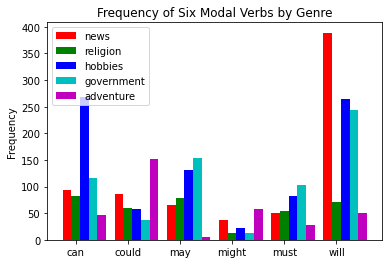

In [208]:
modals=bar_chart(genres, modals, counts)


In [209]:
import matplotlib
import pylab
matplotlib.use('Agg')
pylab.savefig('modals.png') 

<Figure size 432x288 with 0 Axes>

It is also possible to generate such data visualizations on the fly. For example, a web page with form input could permit visitors to specify search parameters, submit the form, and see a dynamically generated visualization. To do this we have to specify the
Agg backend for matplotlib, which is a library for producing raster (pixel) images . Next, we use all the same PyLab methods as before, but instead of displaying the result on a graphical terminal using pylab.show(), we save it to a file using pylab.savefig() . We specify the filename and dpi, then print HTML markup that directs the web browser to load the file. 

<b> NetworkX

In [212]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn


In [214]:
def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child) 
        




In [215]:
def hyponym_graph(start):
    G = nx.Graph() 
    G.depth = {}
    traverse(G, start, start)
    return G

In [220]:
def graph_draw(graph):
    nx.draw(graph,
                     node_size = [16 * graph.degree(n) for n in graph],
                     node_color = [graph.depth[n] for n in graph], 
                     with_labels = False)
    matplotlib.pyplot.show()

In [221]:
 dog = wn.synset('dog.n.01') 

In [222]:
graph = hyponym_graph(dog)

<ipython-input-220-694c7bed3d5e>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  matplotlib.pyplot.show()


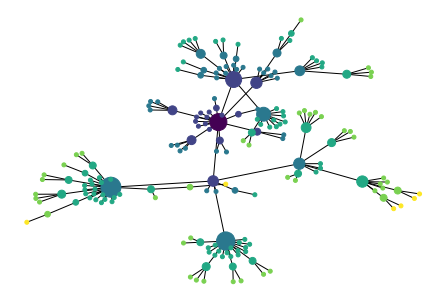

In [223]:
 graph_draw(graph)